# Lab 4: Supervised Learning II - Classification Models

In this lab, we will cover the following topics:
1. Classification models for binary outcomes:
    * k-NN, 
    * decision trees, 
    * random forest, and 
    * SVM
2. Model evaluation
3. Hyperparameter tuning

Each section includes basic implementation and questions for further exploration.


## 1. Classification Models for Binary Outcomes

We will start by implementing various classification models to predict binary outcomes. We will also explore different parameters and visualize the results.

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_recall_curve, average_precision_score

minor_class = 0.5

# Generate synthetic data
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, weights=[1-minor_class,minor_class], random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
def plot_curves(tpr,fpr,auroc,precision,recall,auprc,model_name,minority_class=0.1):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    # Plot ROC curve
    ax1.plot(fpr, tpr, color='green', lw=2, label='AUROC = %0.2f' % auroc)
    ax1.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random')
    ax1.set_xlim([0.0, 1.0])
    ax1.set_ylim([0.0, 1.05])
    ax1.set_xlabel('False Positive Rate')
    ax1.set_ylabel('True Positive Rate')
    ax1.set_title('{} ROC Curve'.format(model_name))
    ax1.legend(loc='lower right')

    # Plot Precision-Recall curve
    ax2.plot(recall, precision, color='purple', lw=2, label='AUPRC = %0.2f' % auprc)
    ax2.axhline(y=minority_class, color='red', lw=2, linestyle='--', label='Random')
    ax2.set_xlabel('Recall')
    ax2.set_ylabel('Precision')
    ax2.set_title('{} Precision-Recall Curve'.format(model_name))
    ax2.legend(loc='lower left')

    plt.tight_layout()
    plt.show()

### 1.1 k-Nearest Neighbors (k-NN)
Next, we will implement a k-Nearest Neighbours classifier. We will also explore different parameters and visualize the results.

In [ ]:
#KNeighborsClassifier?
# default n_neighbours = 5, ie looking at majority class among 5 nearest neighbours 
# distancing bia 'Minkowski' distancing --> bw euclidian + manhattan, 
#           scalable on how much you want to be like one or the other

Init signature:
KNeighborsClassifier(
    n_neighbors=5,
    *,
    weights='uniform',
    algorithm='auto',
    leaf_size=30,
    p=2,
    metric='minkowski',
    metric_params=None,
    n_jobs=None,
)
Docstring:     
Classifier implementing the k-nearest neighbors vote.

Read more in the :ref:`User Guide <classification>`.

Parameters
----------
n_neighbors : int, default=5
    Number of neighbors to use by default for :meth:`kneighbors` queries.

weights : {'uniform', 'distance'}, callable or None, default='uniform'
    Weight function used in prediction.  Possible values:

    - 'uniform' : uniform weights.  All points in each neighborhood
      are weighted equally.
    - 'distance' : weight points by the inverse of their distance.
      in this case, closer neighbors of a query point will have a
      greater influence than neighbors which are further away.
    - [callable] : a user-defined function which accepts an
      array of distances, and returns an array of the same shape

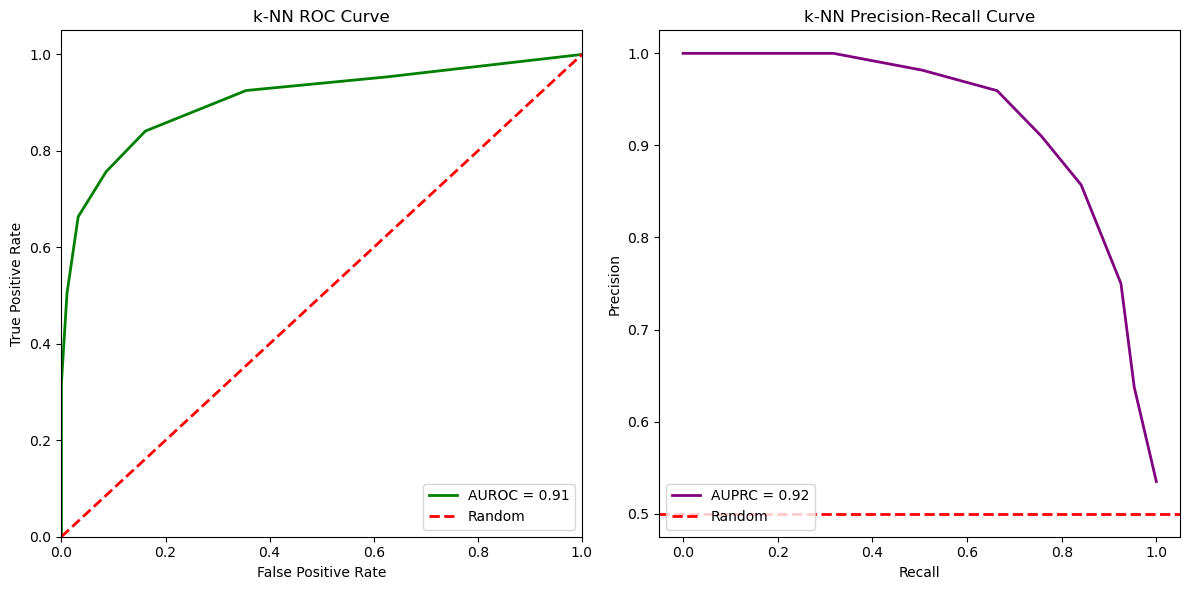

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

X_train_scaled = StandardScaler().fit_transform(X_train)
X_test_scaled = StandardScaler().fit_transform(X_test)

# Train a k-NN classifier
# INSTANTIATE, FIT, PREDICT
# instance = model(), .fit(), .predict_proba() (bc here predict probability of True)
knn = KNeighborsClassifier(n_neighbors=7,metric='manhattan')
knn.fit(X_train, y_train)

# Predict probabilities
y_scores_knn = knn.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_scores_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Compute Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_scores_knn)
average_precision = average_precision_score(y_test, y_scores_knn)

plot_curves(tpr_knn,fpr_knn,roc_auc_knn,precision,recall,average_precision,'k-NN',minority_class=minor_class)


In [ ]:
# sns.pairplot(pd.DataFrame(X, columns=[f'Feature {i}' for i in range(X_train.shape[1])]), hue=y_train, palette='coolwarm')

#### Questions for Exploration
   - How does scaling or reducing the number of features affect the performance of the k-NN classifier?
   - What happens to the ROC curve and AUC score when you increase or decrease the number of neighbors?
   - How does the choice of distance metric (e.g., Euclidean, Manhattan) impact the performance of the k-NN classifier?

### 1.2 Decision Tree
Next, we will implement a Decision Tree classifier. We will also explore different parameters and visualize the results.

In [ ]:
#DecisionTreeClassifier?
# splitting based on gini impurity;
# no max depth == classifies until no more data points left over

Init signature:
DecisionTreeClassifier(
    *,
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0,
    monotonic_cst=None,
)
Docstring:     
A decision tree classifier.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"gini", "entropy", "log_loss"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "log_loss" and "entropy" both for the
    Shannon information gain, see :ref:`tree_mathematical_formulation`.

splitter : {"best", "random"}, default="best"
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose the best split and "random" to choose
    the best random split.

max_depth : int, default=None

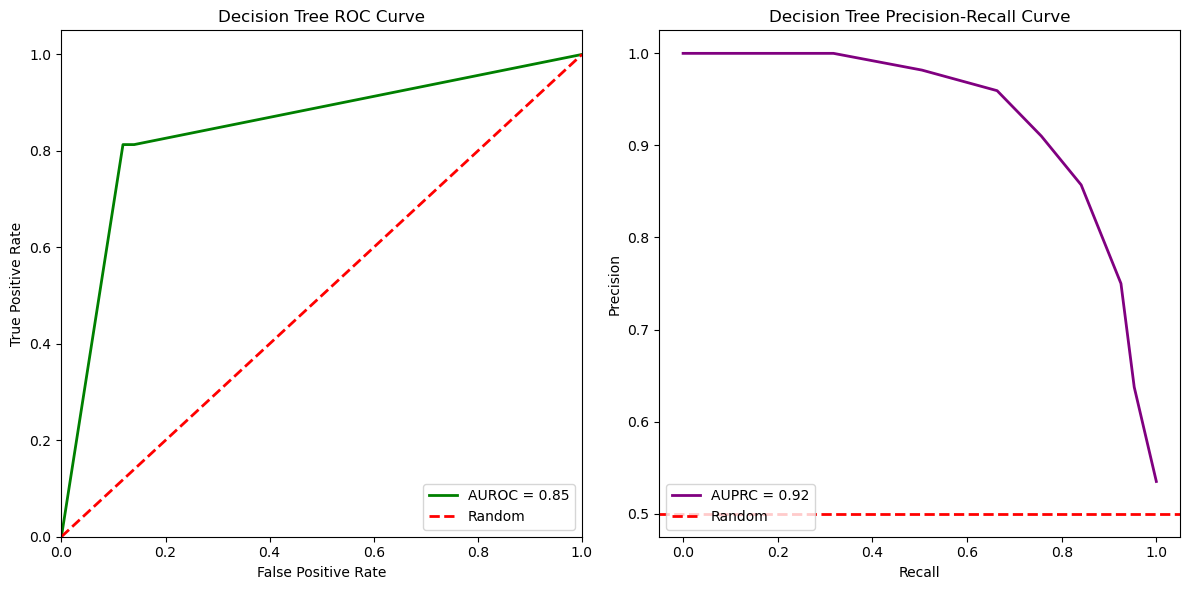

In [48]:
# Train a decision tree classifier
tree = DecisionTreeClassifier(criterion='entropy', max_depth=None, min_samples_leaf=2, min_samples_split= 2, random_state=42)
tree.fit(X_train, y_train)

# Predict probabilities
y_scores_tree = tree.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_scores_tree)
roc_auc_tree = auc(fpr_tree, tpr_tree)

# Compute Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_scores_knn)
average_precision = average_precision_score(y_test, y_scores_knn)

plot_curves(tpr_tree,fpr_tree,roc_auc_tree,precision,recall,average_precision,'Decision Tree',minority_class=minor_class)


### Questions for Exploration
   - How does changing the maximum depth (`max_depth`) of the decision tree affect its performance?
   - What is the impact of using different criteria for splitting (e.g., `gini`, `entropy`) on the decision tree's performance?
   - How does pruning the decision tree (by setting `min_samples_split` or `min_samples_leaf`) affect its performance and complexity?

### 1.3 Random Forest
Next, we will implement a Random Forest classifier. We will also explore different parameters and visualize the results.

In [ ]:
#RandomForestClassifier?
#n_estimators == number of trees in your forest
# bootstrap = True by default; different bootstrap samples (w replacement) to train the different trees on

Init signature:
RandomForestClassifier(
    n_estimators=100,
    *,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='sqrt',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,
    monotonic_cst=None,
)
Docstring:     
A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree
classifiers on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.
Trees in the forest use the best split strategy, i.e. equivalent to passing
`splitter="best"` to the underlying :class:`~sklearn.tree.DecisionTreeRegressor`.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the 

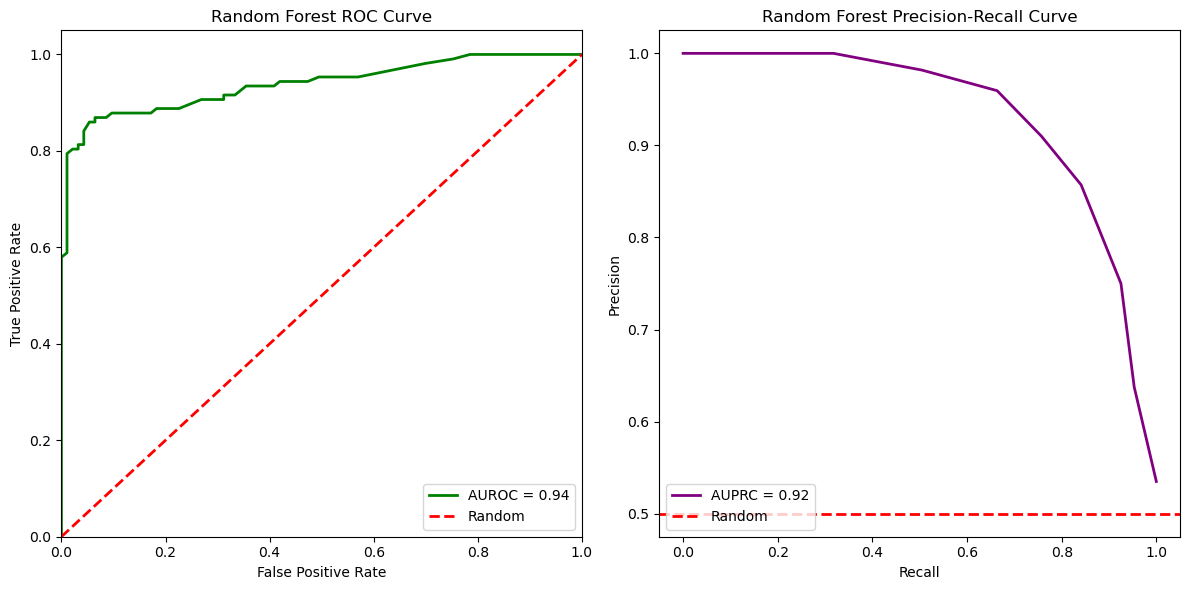

In [51]:
# Train a random forest classifier
forest = RandomForestClassifier(n_estimators=100,random_state=42)
forest.fit(X_train, y_train)

# Predict probabilities
y_scores_forest = forest.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr_forest, tpr_forest, _ = roc_curve(y_test, y_scores_forest)
roc_auc_forest = auc(fpr_forest, tpr_forest)

# Compute Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_scores_knn)
average_precision = average_precision_score(y_test, y_scores_knn)

plot_curves(tpr_forest,fpr_forest,roc_auc_forest,precision,recall,average_precision,'Random Forest',minority_class=minor_class)


In [53]:
importances = forest.feature_importances_
print(np.sum(importances))

1.0000000000000002


### Questions for Exploration
   - How does changing the number of trees (`n_estimators`) in the random forest affect its performance and stability?
   - What is the impact of changing the maximum depth (`max_depth`) of the trees in the random forest?
   - How does the random forest handle overfitting compared to a single decision tree?

### 1.4 Support Vector Machine (SVM)
Next, we will implement a Support Vector Machine classifier (SVC). We will also explore different parameters and visualize the results.

In [ ]:
#SVC? 
# for separating data along straight lines
# here, C hyperparameter cotrolling how hard or soft the margin is

Init signature:
SVC(
    *,
    C=1.0,
    kernel='rbf',
    degree=3,
    gamma='scale',
    coef0=0.0,
    shrinking=True,
    probability=False,
    tol=0.001,
    cache_size=200,
    class_weight=None,
    verbose=False,
    max_iter=-1,
    decision_function_shape='ovr',
    break_ties=False,
    random_state=None,
)
Docstring:     
C-Support Vector Classification.

The implementation is based on libsvm. The fit time scales at least
quadratically with the number of samples and may be impractical
beyond tens of thousands of samples. For large datasets
consider using :class:`~sklearn.svm.LinearSVC` or
:class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
:class:`~sklearn.kernel_approximation.Nystroem` transformer or
other :ref:`kernel_approximation`.

The multiclass support is handled according to a one-vs-one scheme.

For details on the precise mathematical formulation of the provided
kernel functions and how `gamma`, `coef0` and `degree` affect each
other, see the

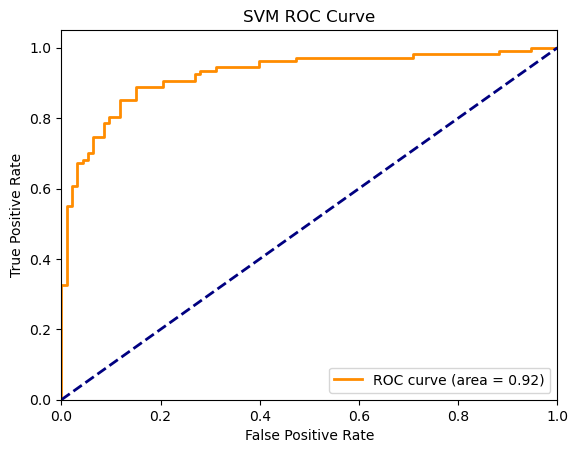

In [10]:
# Train an SVM classifier
svm = SVC(probability=True, random_state=42)
svm.fit(X_train, y_train)

# Predict probabilities
y_scores_svm = svm.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_scores_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Plot ROC curve
plt.figure()
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_svm)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC Curve')
plt.legend(loc='lower right')
plt.show()


### Questions for Exploration
   - How does changing the regularization parameter (`C`) affect the performance of the SVM classifier?
   - What is the impact of using different kernel functions (e.g., `linear`, `rbf`, `poly`) on the SVM's performance?
   - How does the choice of kernel parameters (e.g., `gamma` for the RBF kernel) influence the SVM's decision boundary?

## 2. Model Evaluation

We will evaluate the models using various metrics such as accuracy, precision, recall, F1 score, and ROC AUC.

In [11]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Evaluate the models
models = {'k-NN': knn, 'Decision Tree': tree, 'Random Forest': forest, 'SVM': svm}
for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"{name} - Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}")


k-NN - Accuracy: 0.81, Precision: 0.88, Recall: 0.75, F1 Score: 0.81
Decision Tree - Accuracy: 0.88, Precision: 0.93, Recall: 0.83, F1 Score: 0.88
Random Forest - Accuracy: 0.90, Precision: 0.95, Recall: 0.86, F1 Score: 0.90
SVM - Accuracy: 0.84, Precision: 0.90, Recall: 0.80, F1 Score: 0.85


### Questions for Exploration
   - How do the accuracy, precision, recall, and F1 score compare across different classifiers?
   - What are the trade-offs between precision and recall for each classifier, and how can you visualize these trade-offs using Precision-Recall curves?
   - How does the class imbalance in the dataset affect the evaluation metrics, and what techniques can be used to address this imbalance?

## 3. Hyperparameter Tuning

We will perform hyperparameter tuning using grid search to find the best parameters for each model.

_Can use the GridSearch() function to test all the different hyperparameters we're considering and it will return the best combo._

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grids
param_grid_knn = {'n_neighbors': [3, 5, 7, 9],'metric': ['euclidean', 'manhattan', 'minkowski']}
param_grid_tree = {'max_depth': [None, 10, 20, 30],'criterion': ['gini', 'entropy'],
                   'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
#if you let the depth go down to its limit, more likely to overfit the data
param_grid_forest = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
# more trees = less overfitting of data
param_grid_svm = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}

# INSTANTIATE grid search
# cv=5: cross validation; split data into 5 subsets, train on 4, test on 1 but like using each subset as a test set to the prior training
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy')
grid_search_tree = GridSearchCV(DecisionTreeClassifier(), param_grid_tree, cv=5, scoring='accuracy')
grid_search_forest = GridSearchCV(RandomForestClassifier(), param_grid_forest, cv=5, scoring='accuracy')
grid_search_svm = GridSearchCV(SVC(probability=True), param_grid_svm, cv=5, scoring='accuracy')

grid_search_knn.fit(X_train, y_train)
grid_search_tree.fit(X_train, y_train)
grid_search_forest.fit(X_train, y_train)
grid_search_svm.fit(X_train, y_train)

# Print best parameters and scores
print(f"Best parameters for k-NN: {grid_search_knn.best_params_}")
print(f"Best score for k-NN: {grid_search_knn.best_score_}")

print(f"Best parameters for Decision Tree: {grid_search_tree.best_params_}")
print(f"Best score for Decision Tree: {grid_search_tree.best_score_}")

print(f"Best parameters for Random Forest: {grid_search_forest.best_params_}")
print(f"Best score for Random Forest: {grid_search_forest.best_score_}")

print(f"Best parameters for SVM: {grid_search_svm.best_params_}")
print(f"Best score for SVM: {grid_search_svm.best_score_}")


Best parameters for k-NN: {'metric': 'manhattan', 'n_neighbors': 7}
Best score for k-NN: 0.8487500000000001
Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best score for Decision Tree: 0.88375
Best parameters for Random Forest: {'max_depth': None, 'n_estimators': 100}
Best score for Random Forest: 0.8987499999999999
Best parameters for SVM: {'C': 0.1, 'kernel': 'linear'}
Best score for SVM: 0.87375


In [ ]:
#GridSearchCV?

Init signature:
GridSearchCV(
    estimator,
    param_grid,
    *,
    scoring=None,
    n_jobs=None,
    refit=True,
    cv=None,
    verbose=0,
    pre_dispatch='2*n_jobs',
    error_score=nan,
    return_train_score=False,
)
Docstring:     
Exhaustive search over specified parameter values for an estimator.

Important members are fit, predict.

GridSearchCV implements a "fit" and a "score" method.
It also implements "score_samples", "predict", "predict_proba",
"decision_function", "transform" and "inverse_transform" if they are
implemented in the estimator used.

The parameters of the estimator used to apply these methods are optimized
by cross-validated grid-search over a parameter grid.

Read more in the :ref:`User Guide <grid_search>`.

Parameters
----------
estimator : estimator object
    This is assumed to implement the scikit-learn estimator interface.
    Either estimator needs to provide a ``score`` function,
    or ``scoring`` must be passed.

param_grid : dict or list of

### Questions for Exploration
   - How does hyperparameter tuning using grid search improve the performance of each classifier?
   - What are the best hyperparameters found for each classifier, and how do they compare to the default parameters?
   - How does the choice of cross-validation strategy (e.g., k-fold, stratified k-fold) impact the results of hyperparameter tuning?

## Extensions

1. **Feature Importance**
  * For tree-based models (decision tree and random forest), which features are the most important, and how can you visualize feature importance?
  * How does feature scaling (e.g., standardization, normalization) affect the performance of other distance-based classifiers (i.e., SVM)?

2. **Model Comparison**
  * Compare the performance of all classifiers on the same dataset using a single evaluation metric (e.g., ROC AUC) and visualize the results.
  * How do the classifiers perform on different types of datasets (e.g., datasets with different levels of noise, feature correlations)?